<h1><center>MNIST classification using Keras<center></h1>

# Importing Keras

In [37]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 1.15.0
Using keras version 2.2.5


## Loading and preparing the MNIST dataset

Load the MNIST dataset via keras.datasets. Again, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [0]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
from keras.datasets import mnist
# START CODE HERE
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# END CODE HERE

In [39]:
from keras.utils.np_utils import to_categorical

# START CODE HERE
train_labels=to_categorical(y_train)
test_labels=to_categorical(y_test)

train_labels.shape

(60000, 10)

In [0]:
#  Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = x_train.shape[1], x_train.shape[2]

train_images = x_train.reshape((x_train.shape[0],img_rows*img_cols))
test_images = x_test.reshape((x_test.shape[0],img_rows*img_cols))

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?

# START CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_images)
train_images=scaler.transform(train_images)

scaler.fit(test_images)
test_images=scaler.transform(test_images)

# END CODE HERE

In [41]:
train_images.shape

(60000, 784)

## Defining the neural network architecture (i.e., the network model)

Look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic information on how to use numpy.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [0]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# START CODE HERE
input_shape = 784
output_shape = 10

model = Sequential()
model.add(Dense(300, input_dim=input_shape, activation='sigmoid'))
model.add(Dense(output_shape, activation='sigmoid'))

# END CODE HERE

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [49]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

# START CODE HERE

sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# END CODE HERE
# We can now have a look at the defined model topology
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [50]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

# START CODE HERE
history=model.fit(train_images, train_labels, epochs=epochs, batch_size=10,verbose=2,validation_data=(test_images,test_labels))
# END CODE HERE

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 22s - loss: 0.5531 - acc: 0.8590 - val_loss: 0.3119 - val_acc: 0.9109
Epoch 2/10
 - 22s - loss: 0.2912 - acc: 0.9159 - val_loss: 0.2664 - val_acc: 0.9233
Epoch 3/10
 - 22s - loss: 0.2552 - acc: 0.9267 - val_loss: 0.2481 - val_acc: 0.9289
Epoch 4/10
 - 22s - loss: 0.2331 - acc: 0.9336 - val_loss: 0.2323 - val_acc: 0.9329
Epoch 5/10
 - 22s - loss: 0.2154 - acc: 0.9389 - val_loss: 0.2209 - val_acc: 0.9370
Epoch 6/10
 - 22s - loss: 0.2001 - acc: 0.9431 - val_loss: 0.2089 - val_acc: 0.9417
Epoch 7/10
 - 22s - loss: 0.1864 - acc: 0.9470 - val_loss: 0.1989 - val_acc: 0.9440
Epoch 8/10
 - 22s - loss: 0.1740 - acc: 0.9507 - val_loss: 0.1884 - val_acc: 0.9459
Epoch 9/10
 - 22s - loss: 0.1630 - acc: 0.9544 - val_loss: 0.1818 - val_acc: 0.9466
Epoch 10/10
 - 22s - loss: 0.1527 - acc: 0.9570 - val_loss: 0.1747 - val_acc: 0.9498


## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

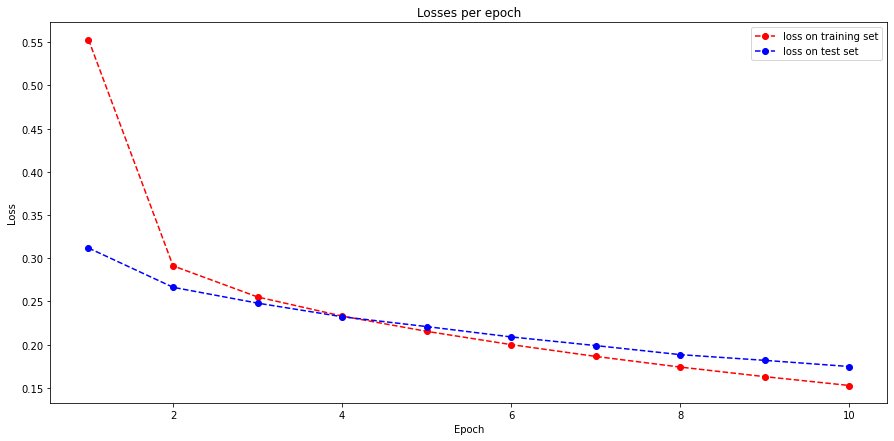

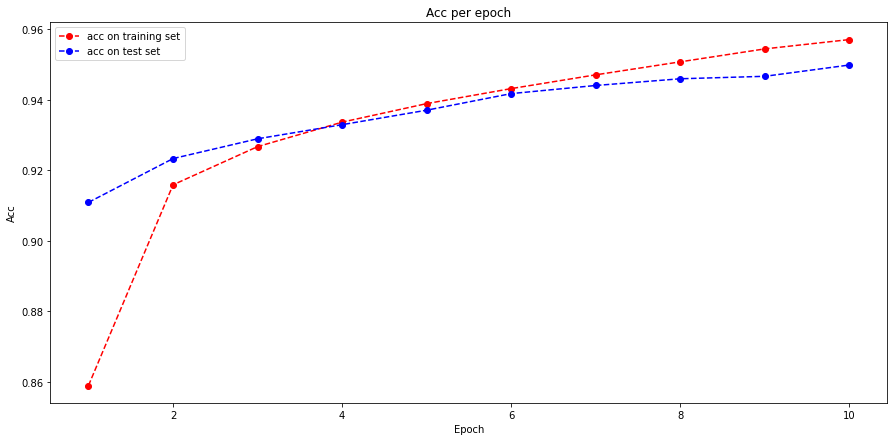

In [51]:
# We now want to plot the train and validation loss functions and accuracy curves

epochs=np.arange(1,11)

#Losses
losses=history.history['loss']
val_losses=history.history['val_loss']
#Plot
plt.figure(figsize=(15,7))
plt.plot(epochs,losses,marker='o',linestyle='--',color='r',label='loss on training set')
plt.plot(epochs,val_losses,marker='o',linestyle='--',color='b',label='loss on test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses per epoch')
plt.legend()
plt.show()

#Accuracies
accuracies=history.history['acc']
val_accuracies=history.history['val_acc']
#Plot
plt.figure(figsize=(15,7))
plt.plot(epochs,accuracies,marker='o',linestyle='--',color='r',label='acc on training set')
plt.plot(epochs,val_accuracies,marker='o',linestyle='--',color='b',label='acc on test set')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Acc per epoch')
plt.legend()
plt.show()

## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

### 1) Increasing the size of the batch

In [52]:
#Increasing the size of the batch 

model = Sequential()
model.add(Dense(300, input_dim=input_shape, activation='sigmoid'))
model.add(Dense(output_shape, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history2=model.fit(train_images, train_labels, epochs=10, batch_size=30,verbose=2,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.8801 - acc: 0.8011 - val_loss: 0.4427 - val_acc: 0.8918
Epoch 2/10
 - 7s - loss: 0.3934 - acc: 0.8945 - val_loss: 0.3420 - val_acc: 0.9060
Epoch 3/10
 - 7s - loss: 0.3304 - acc: 0.9079 - val_loss: 0.3072 - val_acc: 0.9127
Epoch 4/10
 - 7s - loss: 0.3013 - acc: 0.9143 - val_loss: 0.2885 - val_acc: 0.9161
Epoch 5/10
 - 7s - loss: 0.2829 - acc: 0.9185 - val_loss: 0.2750 - val_acc: 0.9213
Epoch 6/10
 - 7s - loss: 0.2696 - acc: 0.9223 - val_loss: 0.2664 - val_acc: 0.9224
Epoch 7/10
 - 7s - loss: 0.2590 - acc: 0.9261 - val_loss: 0.2593 - val_acc: 0.9253
Epoch 8/10
 - 8s - loss: 0.2502 - acc: 0.9282 - val_loss: 0.2528 - val_acc: 0.9264
Epoch 9/10
 - 7s - loss: 0.2425 - acc: 0.9309 - val_loss: 0.2473 - val_acc: 0.9285
Epoch 10/10
 - 7s - loss: 0.2355 - acc: 0.9323 - val_loss: 0.2423 - val_acc: 0.9302


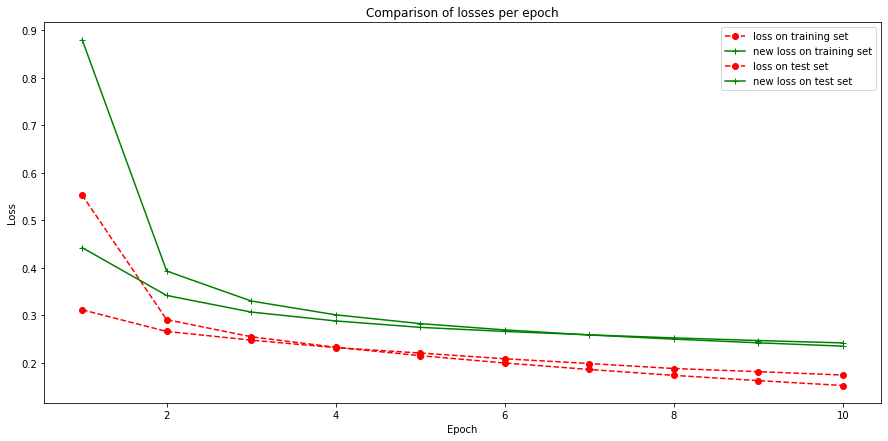

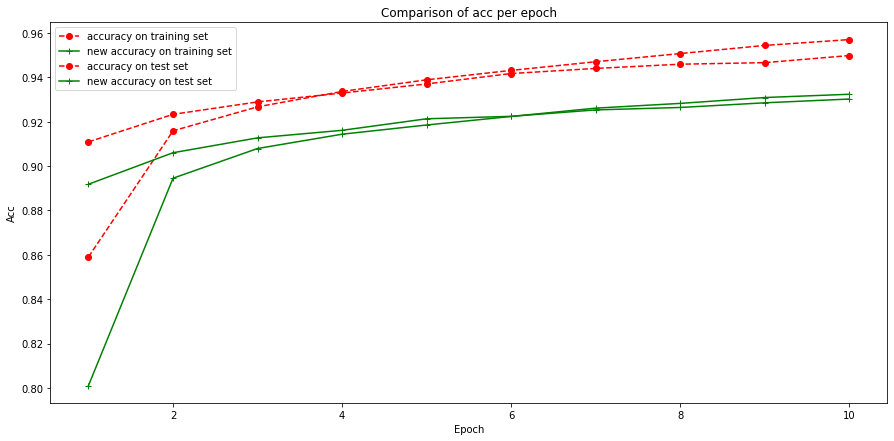

In [56]:
#Comparison 

# We now want to plot the train and validation loss functions and accuracy curves

epochs=np.arange(1,11)

#New losses
losses2=history2.history['loss']
val_losses2=history2.history['val_loss']

#New accuracies 
accuracies2=history2.history['acc']
val_accuracies2=history2.history['val_acc']

#Plot
plt.figure(figsize=(15,7))
plt.plot(epochs,losses,marker='o',linestyle='--',color='r',label='loss on training set')
plt.plot(epochs,losses2,marker='+',color='g',label='new loss on training set')
plt.plot(epochs,val_losses,marker='o',linestyle='--',color='r',label='loss on test set')
plt.plot(epochs,val_losses2,marker='+',color='g',label='new loss on test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison of losses per epoch')
plt.legend()
plt.show()

plt.figure(figsize=(15,7))
plt.plot(epochs,accuracies,marker='o',linestyle='--',color='r',label='accuracy on training set')
plt.plot(epochs,accuracies2,marker='+',color='g',label='new accuracy on training set')
plt.plot(epochs,val_accuracies,marker='o',linestyle='--',color='r',label='accuracy on test set')
plt.plot(epochs,val_accuracies2,marker='+',color='g',label='new accuracy on test set')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Comparison of acc per epoch')
plt.legend()
plt.show()


Viewing the scores, we can see that it's better to take a little batch. In fact, with size_batch=30, we average over more data, and consequently, our model is less precise. 

### 2) Sigmoid --> Relu 

In [57]:
model = Sequential()
model.add(Dense(300, input_dim=input_shape, activation='relu'))
model.add(Dense(output_shape, activation='relu'))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history3=model.fit(train_images, train_labels, epochs=10, batch_size=10,verbose=2,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 22s - loss: 1.7354 - acc: 0.3382 - val_loss: 0.9955 - val_acc: 0.6607
Epoch 2/10
 - 22s - loss: 0.7566 - acc: 0.7925 - val_loss: 0.9580 - val_acc: 0.6311
Epoch 3/10
 - 22s - loss: 0.7885 - acc: 0.7406 - val_loss: 0.7009 - val_acc: 0.8121
Epoch 4/10
 - 22s - loss: 0.8403 - acc: 0.6819 - val_loss: 0.9220 - val_acc: 0.6314
Epoch 5/10
 - 22s - loss: 0.9166 - acc: 0.6411 - val_loss: 0.9553 - val_acc: 0.5819
Epoch 6/10
 - 22s - loss: 0.9629 - acc: 0.5696 - val_loss: 1.0416 - val_acc: 0.5368
Epoch 7/10
 - 22s - loss: 0.8384 - acc: 0.6898 - val_loss: 0.7238 - val_acc: 0.7722
Epoch 8/10
 - 22s - loss: 0.6174 - acc: 0.8157 - val_loss: 0.6569 - val_acc: 0.8248
Epoch 9/10
 - 22s - loss: 0.5644 - acc: 0.8626 - val_loss: 0.5706 - val_acc: 0.8838
Epoch 10/10
 - 22s - loss: 0.6206 - acc: 0.7964 - val_loss: 0.7730 - val_acc: 0.7088


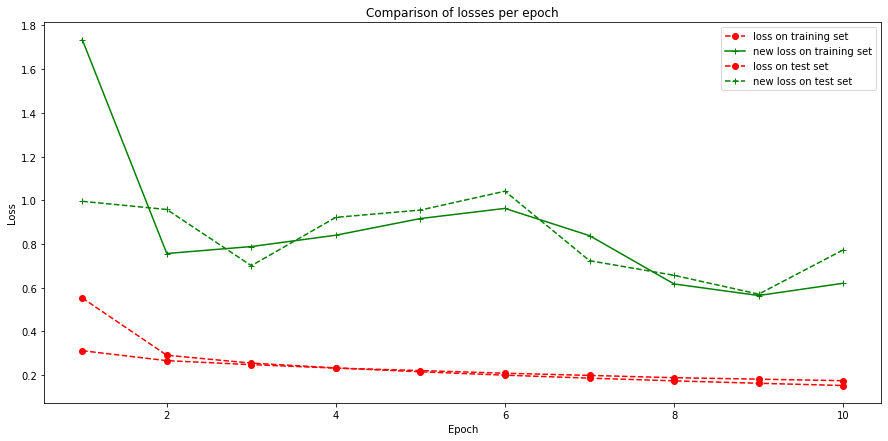

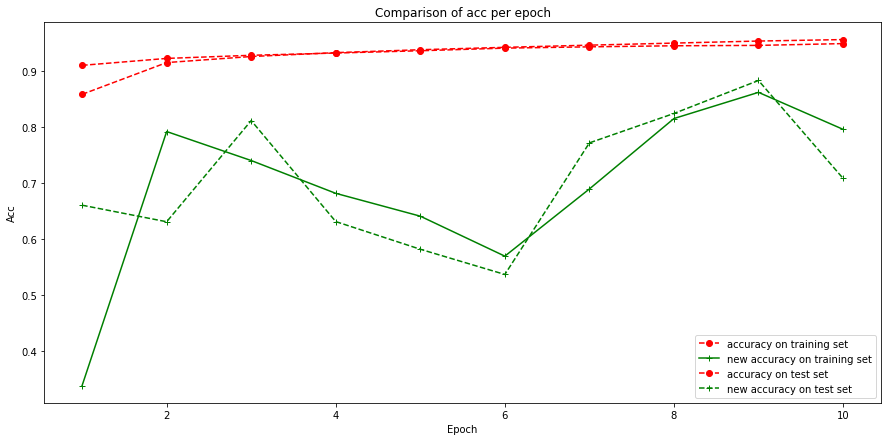

In [58]:
#Comparison 

# We now want to plot the train and validation loss functions and accuracy curves

epochs=np.arange(1,11)

#New losses
losses3=history3.history['loss']
val_losses3=history3.history['val_loss']

#New accuracies 
accuracies3=history3.history['acc']
val_accuracies3=history3.history['val_acc']

#Plot
plt.figure(figsize=(15,7))
plt.plot(epochs,losses,marker='o',linestyle='--',color='r',label='loss on training set')
plt.plot(epochs,losses3,marker='+',color='g',label='new loss on training set')
plt.plot(epochs,val_losses,marker='o',linestyle='--',color='r',label='loss on test set')
plt.plot(epochs,val_losses3,marker='+',linestyle='--',color='g',label='new loss on test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison of losses per epoch')
plt.legend()
plt.show()

plt.figure(figsize=(15,7))
plt.plot(epochs,accuracies,marker='o',linestyle='--',color='r',label='accuracy on training set')
plt.plot(epochs,accuracies3,marker='+',color='g',label='new accuracy on training set')
plt.plot(epochs,val_accuracies,marker='o',linestyle='--',color='r',label='accuracy on test set')
plt.plot(epochs,val_accuracies3,marker='+',linestyle='--',color='g',label='new accuracy on test set')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Comparison of acc per epoch')
plt.legend()
plt.show()

With relu instead of sigmoid, the model is less efficient for this dataset. It's also more fluctuant, and doesn't have a tendency. Maybe the epoch number is too small ? 

### 3) A larger architecture

In [59]:
model = Sequential()
model.add(Dense(300, input_dim=input_shape, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(84, activation='sigmoid'))
model.add(Dense(output_shape, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history4=model.fit(train_images, train_labels, epochs=10, batch_size=10,verbose=2,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 26s - loss: 2.0097 - acc: 0.3749 - val_loss: 1.2251 - val_acc: 0.6681
Epoch 2/10
 - 25s - loss: 0.7674 - acc: 0.8001 - val_loss: 0.4899 - val_acc: 0.8719
Epoch 3/10
 - 25s - loss: 0.4137 - acc: 0.8878 - val_loss: 0.3570 - val_acc: 0.8986
Epoch 4/10
 - 25s - loss: 0.3304 - acc: 0.9065 - val_loss: 0.3075 - val_acc: 0.9112
Epoch 5/10
 - 25s - loss: 0.2886 - acc: 0.9175 - val_loss: 0.2816 - val_acc: 0.9178
Epoch 6/10
 - 25s - loss: 0.2599 - acc: 0.9254 - val_loss: 0.2576 - val_acc: 0.9265
Epoch 7/10
 - 25s - loss: 0.2383 - acc: 0.9316 - val_loss: 0.2432 - val_acc: 0.9303
Epoch 8/10
 - 25s - loss: 0.2206 - acc: 0.9367 - val_loss: 0.2299 - val_acc: 0.9344
Epoch 9/10
 - 25s - loss: 0.2055 - acc: 0.9417 - val_loss: 0.2176 - val_acc: 0.9378
Epoch 10/10
 - 25s - loss: 0.1916 - acc: 0.9455 - val_loss: 0.2056 - val_acc: 0.9418


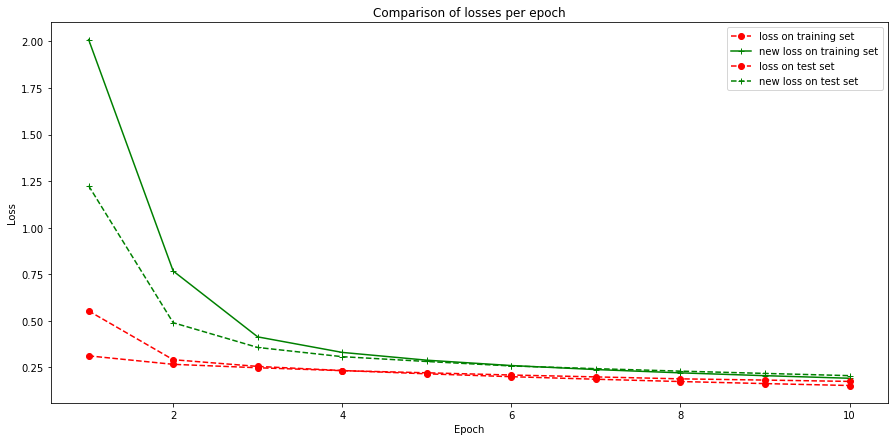

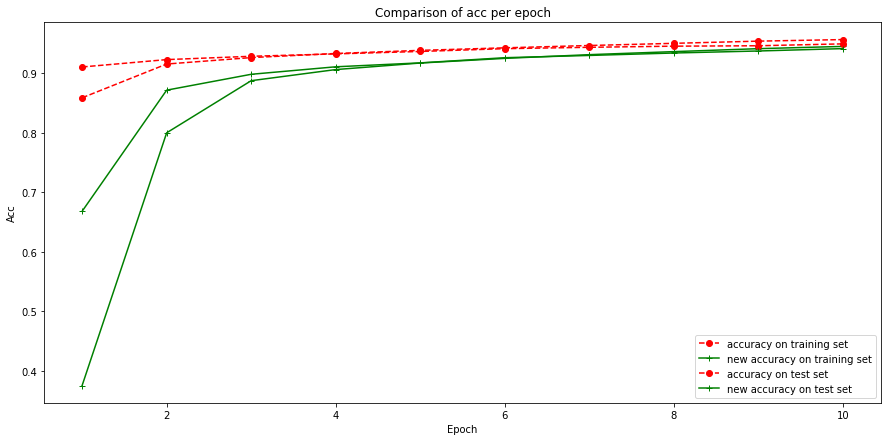

In [61]:
#Comparison 

# We now want to plot the train and validation loss functions and accuracy curves

epochs=np.arange(1,11)

#New losses
losses4=history4.history['loss']
val_losses4=history4.history['val_loss']

#New accuracies 
accuracies4=history4.history['acc']
val_accuracies4=history4.history['val_acc']

#Plot
plt.figure(figsize=(15,7))
plt.plot(epochs,losses,marker='o',linestyle='--',color='r',label='loss on training set')
plt.plot(epochs,losses4,marker='+',color='g',label='new loss on training set')
plt.plot(epochs,val_losses,marker='o',linestyle='--',color='r',label='loss on test set')
plt.plot(epochs,val_losses4,marker='+',linestyle='--',color='g',label='new loss on test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison of losses per epoch')
plt.legend()
plt.show()

plt.figure(figsize=(15,7))
plt.plot(epochs,accuracies,marker='o',linestyle='--',color='r',label='accuracy on training set')
plt.plot(epochs,accuracies4,marker='+',color='g',label='new accuracy on training set')
plt.plot(epochs,val_accuracies,marker='o',linestyle='--',color='r',label='accuracy on test set')
plt.plot(epochs,val_accuracies4,marker='+',color='g',label='new accuracy on test set')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Comparison of acc per epoch')
plt.legend()
plt.show()

This show that having a more complex model is not necessary for this dataset ! 